#**Pelabelan Dengan VADER**

In [ ]:
# Fungsi untuk melabeli sentimen menggunakan VADER
def label_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_score = sia.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return 1  # Sentimen positif
    else:
        return 0  # Sentimen negatif

In [ ]:
    # Baca dataset dari file CSV
    df = pd.read_csv('/content/dataset.csv')

NameError: ignored

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Tambahkan kolom 'label' dengan sentimen yang dilabeli menggunakan VADER
df['label'] = df['tweet'].apply(label_sentiment)

In [ ]:
# Simpan dataframe yang sudah dilabeli ke file CSV
labeled_file_path = 'data_twitter_labeled.csv'
df.to_csv(labeled_file_path, index=False)

return f'<a href="/download">Klik di sini</a> untuk mengunduh file labeled CSV.'


In [ ]:
@app.route('/download')
def download_file():
    labeled_file_path = 'data_twitter_labeled.csv'
    return send_file(labeled_file_path, as_attachment=True, attachment_filename='data_twitter_labeled.csv')

if __name__ == '__main__':
    app.run()

File 'data_twitter_labeled.csv' berhasil diunduh.


# **Import Library & Load Dataset**

Dataset avaiable in : [https://www.kaggle.com/datasets/hafizhadinda/global-recession-in-2023-sentiment-indonesian](https://www.kaggle.com/datasets/hafizhadinda/global-recession-in-2023-sentiment-indonesian)

In [ ]:
pip install rank_bm25

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
#preprocesing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
#split data
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
# mb25
from rank_bm25 import BM25Okapi
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/METOPEN/stress.csv')
df.shape

(2838, 116)

In [ ]:
df.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


# **Pre-Processing**

In [ ]:
# Mengunduh library NLTK
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Fungsi untuk melakukan pre-processing pada teks
def preprocess_text(text):
    # Menghapus akun pengguna Twitter (username)
    text = re.sub(r'@[^\s]+', '', text)

    # Menghapus retweet
    text = re.sub(r'RT[\s]+', '', text)

    # Menghapus karakter non-alfanumerik
    text = re.sub(r'\W', ' ', text)

    # Menghapus angka
    text = re.sub(r'\d+', '', text)

    # Menghapus whitespace berlebih
    text = re.sub(r'\s+', ' ', text)

    # Mengubah teks menjadi lowercase (Case Folding)
    text = text.lower()

    # Menghapus kata-kata yang tidak penting (stopwords)
    stop_words = set(stopwords.words('indonesian'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]

    # Melakukan stemming menggunakan Porter Stemmer
    stemmer = PorterStemmer()
    stemmed_text = [stemmer.stem(word) for word in filtered_text]

    # Menggabungkan kata-kata yang telah diproses menjadi satu teks
    processed_text = ' '.join(stemmed_text)

    return processed_text

In [ ]:
# Membuat DataFrame dari data sentimen
df = pd.DataFrame(df)

In [ ]:
# Menghapus duplikat
df.drop_duplicates(inplace=True)

In [ ]:
# Pre-processing pada data sentimen
df['text	'] = df['text'].apply(preprocess_text)

In [ ]:
def remove_links(text):
    # Menghapus link menggunakan regular expression
    pattern = r"http\S+"
    text = re.sub(pattern, "", text)
    return text

# Menghapus link pada kolom 'tweet'
df['text'] = df['text'].apply(remove_links)

In [ ]:
def remove_retweet(text):
    # Menghapus pola retweet menggunakan regular expression
    pattern = r"RT\s@[A-Za-z0-9_]+: "
    text = re.sub(pattern, "", text)
    return text

# Menghapus retweet pada kolom 'tweet'
df['text'] = df['text'].apply(remove_retweet)

In [ ]:
print(df)

             subreddit post_id sentence_range  \
0                 ptsd  8601tu       (15, 20)   
1           assistance  8lbrx9         (0, 5)   
2                 ptsd  9ch1zh       (15, 20)   
3        relationships  7rorpp        [5, 10]   
4     survivorsofabuse  9p2gbc         [0, 5]   
...                ...     ...            ...   
2833     relationships  7oee1t       [35, 40]   
2834              ptsd  9p4ung       [20, 25]   
2835           anxiety  9nam6l        (5, 10)   
2836    almosthomeless  5y53ya        [5, 10]   
2837              ptsd  5y25cl         [0, 5]   

                                                   text     id  label  \
0     He said he had not felt that way before, sugge...  33181      1   
1     Hey there r/assistance, Not sure if this is th...   2606      0   
2     My mom then hit me with the newspaper and it s...  38816      1   
3     until i met my new boyfriend, he is amazing, h...    239      1   
4     October is Domestic Violence Awareness M

# **Split Data**

Data train : 80%
Data test : 20%

In [ ]:
X = df['text'].tolist()
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Jumlah data latih
num_train = len(X_train)
print("Jumlah data latih:", num_train)

# Jumlah data uji
num_test = len(X_test)
print("Jumlah data uji:", num_test)

Jumlah data latih: 2270
Jumlah data uji: 568


In [ ]:
# Menghapus baris dengan nilai NaN pada y_train
y_train_cleaned = y_train.dropna()

# Menggabungkan X_train_tfidf dan y_train yang sudah dibersihkan
X_train_cleaned = X_train[:len(y_train_cleaned)]

In [ ]:
# Menghapus baris dengan nilai NaN pada y_train
y_test_cleaned = y_test.dropna()


In [ ]:
# Membangun representasi numerik dari data teks menggunakan CountVectorizer dengan N-gram
ngram_range = (1, 2)  # Ubah n-gram range sesuai kebutuhan
vectorizer = CountVectorizer(ngram_range=ngram_range)
X_train_counts = vectorizer.fit_transform(X_train_cleaned)

In [ ]:
df_counts = pd.DataFrame(X_train_counts.toarray(), columns=vectorizer.get_feature_names_out())
print(df_counts)

In [ ]:
# Mengambil daftar fitur (kata-kata) dari CountVectorizer
feature_names = vectorizer.get_feature_names_out()

# Menghitung frekuensi kemunculan kata-kata
word_counts = X_train_counts.sum(axis=0).tolist()[0]

# Membuat histogram dari frekuensi kemunculan kata-kata
plt.figure(figsize=(12, 6))
plt.bar(feature_names, word_counts)
plt.xticks(rotation=90)
plt.xlabel("Kata-kata")
plt.ylabel("Frekuensi")
plt.title("Histogram Frekuensi Kemunculan Kata-kata")
plt.show()

# **BM25**

In [ ]:
# Membangun BM25 Vectorizer
bm25 = BM25Okapi(X_train)

# Mengubah data pelatihan menjadi vektor BM25
X_train_bm25 = [bm25.get_scores(doc) for doc in X_train]

# Mengubah data uji menjadi vektor BM25
X_test_bm25 = [bm25.get_scores(doc) for doc in X_test]

# Menggabungkan X_train_bm25 dan X_test_bm25
X_train_bm25_combined = np.vstack(X_train_bm25)
X_test_bm25_combined = np.vstack(X_test_bm25)

In [ ]:
df.head()

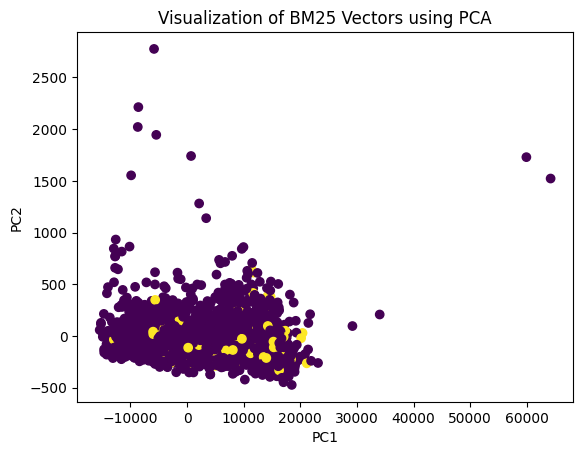

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_bm25_combined)

# Visualisasi
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualization of BM25 Vectors using PCA')
plt.show()

# **Word Embedding**

In [ ]:
import gensim.downloader as api

In [ ]:
X_train_array = np.array(X_train)

In [ ]:
word_embedding_model = api.load("word2vec-google-news-300")
word_embedding_dim = 300

[=================================================-] 99.9% 1661.8/1662.8MB downloaded


In [ ]:
X_train_wordembed = np.zeros((len(X_train), word_embedding_dim))
for i, sentence in enumerate(X_train):
    tokens = word_tokenize(sentence)
    embeddings = []
    for token in tokens:
        if token in word_embedding_model:
            embeddings.append(word_embedding_model[token])
    if embeddings:
        X_train_wordembed[i] = np.mean(embeddings, axis=0)

In [ ]:
# Menghapus baris dengan nilai NaN pada y_train
y_train_cleaned = y_train.dropna()

# Menggabungkan X_train_bm25 dan y_train yang sudah dibersihkan
X_train_bm25_cleaned = X_train_bm25[:y_train_cleaned.shape[0]]

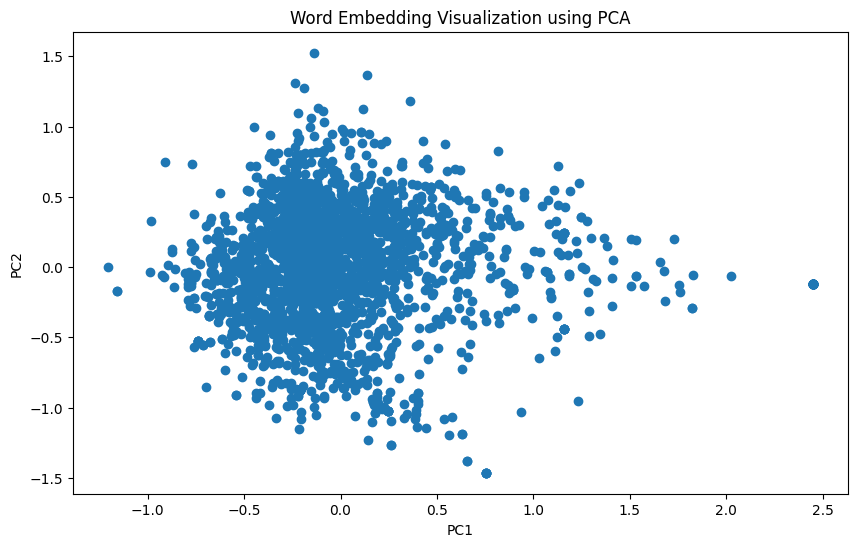

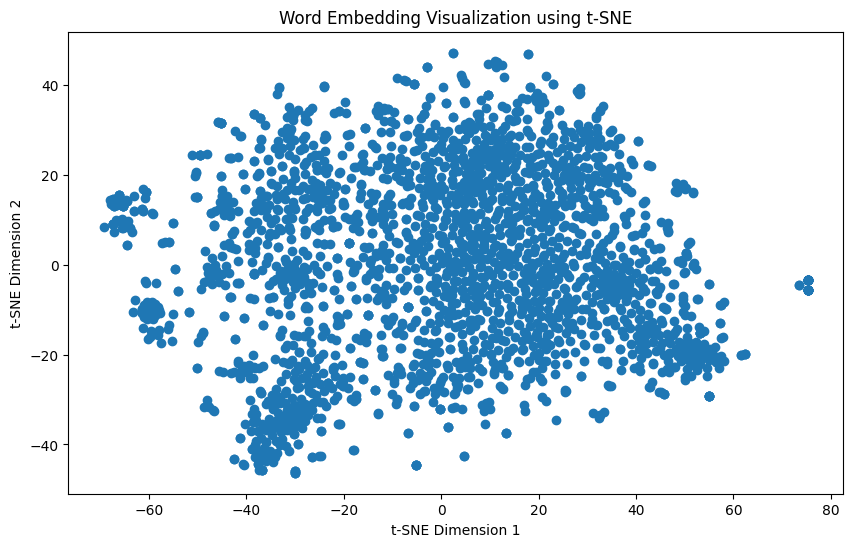

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Melakukan reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
X_train_wordembed_pca = pca.fit_transform(X_train_wordembed)

# Melakukan reduksi dimensi menggunakan t-SNE
tsne = TSNE(n_components=2)
X_train_wordembed_tsne = tsne.fit_transform(X_train_wordembed)

# Memvisualisasikan hasil word embedding dengan PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_train_wordembed_pca[:, 0], X_train_wordembed_pca[:, 1])
plt.title('Word Embedding Visualization using PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Memvisualisasikan hasil word embedding dengan t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(X_train_wordembed_tsne[:, 0], X_train_wordembed_tsne[:, 1])
plt.title('Word Embedding Visualization using t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [ ]:
from nltk.tokenize import word_tokenize
import numpy as np

sentence = "tanda tanda ekonomi usa melambat resesi cepat"

# Tokenisasi kalimat menjadi kata-kata terpisah
tokens = word_tokenize(sentence)

# Inisialisasi matriks untuk menyimpan vektor kata
word_embeddings = np.zeros((len(tokens), word_embedding_dim))

# Mengambil vektor kata untuk setiap kata dalam kalimat
for i, token in enumerate(tokens):
    if token in word_embedding_model:
        word_embeddings[i] = word_embedding_model[token]

# Menghitung rata-rata vektor kata
sentence_embedding = np.mean(word_embeddings, axis=0)

# Menampilkan vektor representasi kalimat
print("Vektor Representasi Kalimat:")
print(sentence_embedding)


Vektor Representasi Kalimat:
[ 2.76227679e-02 -3.76674107e-03  4.72586496e-02  5.10602679e-02
 -1.07421875e-02 -1.83454241e-02  4.07017299e-02 -4.36662946e-02
 -1.17187500e-02  7.46372768e-03 -1.21372768e-02 -1.00027902e-01
 -4.84095982e-02  3.23660714e-02  6.97544643e-04  9.08203125e-02
  6.57784598e-02  6.46623884e-02 -5.67801339e-02  2.13448661e-02
 -3.93763951e-02 -4.81305804e-02  1.85198103e-02 -5.20978655e-03
 -7.44977679e-02 -9.48660714e-03 -1.00864955e-01 -4.25502232e-03
 -2.95758929e-02 -5.60825893e-02 -2.51116071e-03  2.29579381e-02
 -5.44084821e-03  2.29492188e-02 -2.83203125e-02 -9.62611607e-03
 -6.33719308e-02 -2.15541295e-02  7.11495536e-02 -7.89620536e-02
 -4.39453125e-02 -2.11443220e-02  9.43080357e-02  4.32477679e-02
  1.46484375e-02 -4.04575893e-02 -2.56696429e-02 -6.08258929e-02
 -2.49720982e-02  6.13839286e-02 -3.90276228e-02  5.20368304e-02
  6.69642857e-02  3.13895089e-02 -2.42047991e-02  2.37165179e-03
 -7.49162946e-02 -1.41775949e-02 -1.22887748e-02 -8.59375000e

# **Ensemble Learning**

Logistic Regression, Random Forest, Decision Tree, and Support Vector Machine

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

In [ ]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()
model4 = SVC(probability=True)

In [ ]:
ensemble_model = VotingClassifier(estimators=[('lr', model1), ('dt', model2), ('rf', model3), ('svm', model4)], voting='soft')

In [ ]:
ensemble_model.fit(X_train_bm25_cleaned, y_train_cleaned)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('svm', SVC(probability=True))],
                 voting='soft')

In [ ]:
# Membuat prediksi dengan model ensemble pada data uji
y_pred_ensemble = ensemble_model.predict(X_test_bm25_combined)
y_pred_proba_ensemble = ensemble_model.predict_proba(X_test_bm25_combined)


## Confusion Matrix

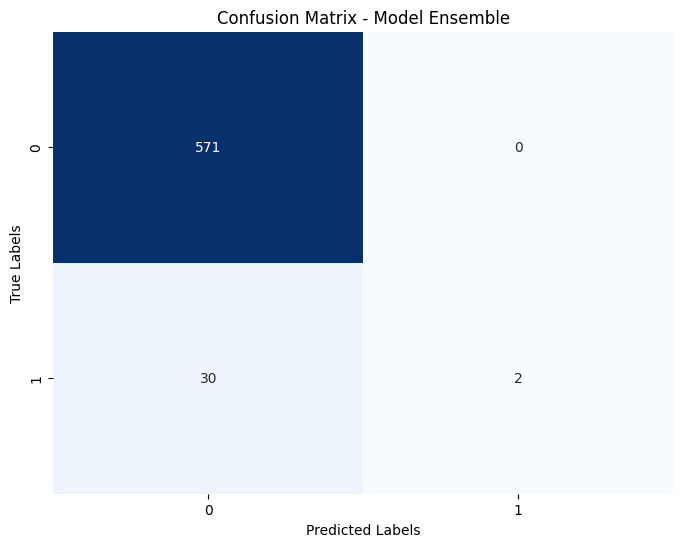

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Identify NaN values in y_test
nan_indices = np.isnan(y_test)

# Remove NaN values from y_test
y_test_clean = y_test[~nan_indices]

# Remove corresponding elements from y_pred_ensemble
y_pred_ensemble_clean = y_pred_ensemble[~nan_indices]

# Create confusion matrix
cm = confusion_matrix(y_test_clean, y_pred_ensemble_clean)


# Membuat heatmap dari confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Model Ensemble")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# **Accuracy**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Mengubah y_pred_ensemble menjadi array numpy
y_pred_ensemble = np.array(y_pred_ensemble)

# Memastikan jumlah sampel yang konsisten
min_len = min(len(y_test_cleaned), len(y_pred_ensemble))
y_test_cleaned = y_test_cleaned[:min_len]
y_pred_ensemble = y_pred_ensemble[:min_len]

# Menampilkan metrik evaluasi
accuracy = accuracy_score(y_test_cleaned, y_pred_ensemble)
precision = precision_score(y_test_cleaned, y_pred_ensemble, average='weighted')
recall = recall_score(y_test_cleaned, y_pred_ensemble, average='weighted')
f1 = f1_score(y_test_cleaned, y_pred_ensemble, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9502487562189055
Precision: 0.9527321793693762
Recall: 0.9502487562189055
F1-score: 0.9289364260807987
